In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("Melbourne_housing_FULL.csv")
df_raw = df.copy()
df_raw.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [4]:
df_raw.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


0          NaN
1    1480000.0
2    1035000.0
3          NaN
4    1465000.0
Name: Price, dtype: float64

Text(0.5, 1.0, 'Price')

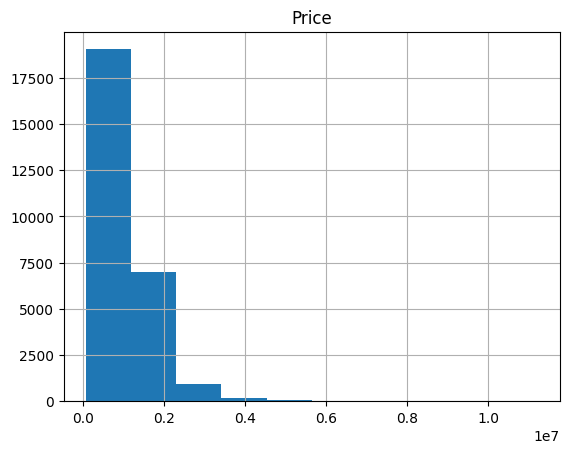

In [5]:
display(df_raw.Price.head())
df_raw.Price.dropna().hist()
plt.title('Price')

Text(0.5, 1.0, 'log(Price)')

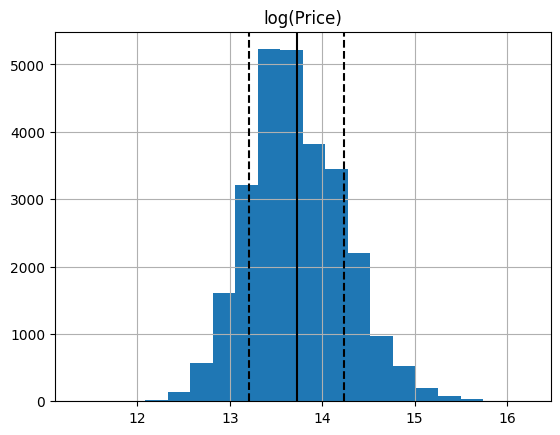

In [6]:
df_raw['log_Price'] = np.log1p(df_raw.Price.dropna())

log_price_mean = df_raw['log_Price'].mean()
log_price_std = df_raw['log_Price'].std()

# view log(price) data
df_raw.log_Price.hist(bins=20)
plt.axvline((log_price_mean+log_price_std), color='k', linestyle='--')
plt.axvline((log_price_mean-log_price_std), color='k', linestyle='--')
plt.axvline(log_price_mean, color='k', linestyle='-')
plt.title('log(Price)')

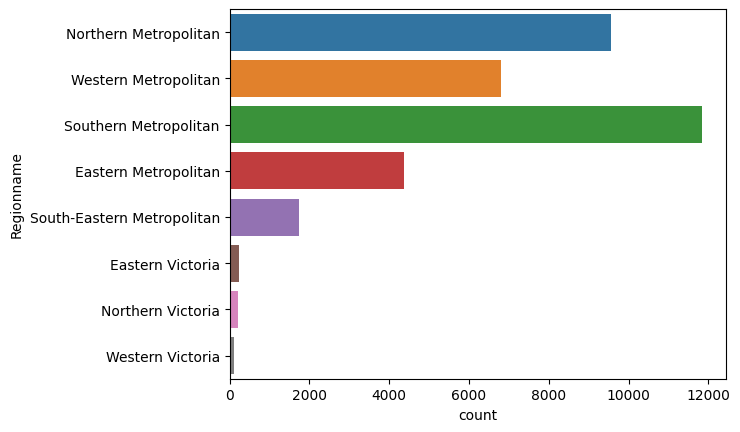

In [7]:
sns.countplot(data=df_raw, y='Regionname');


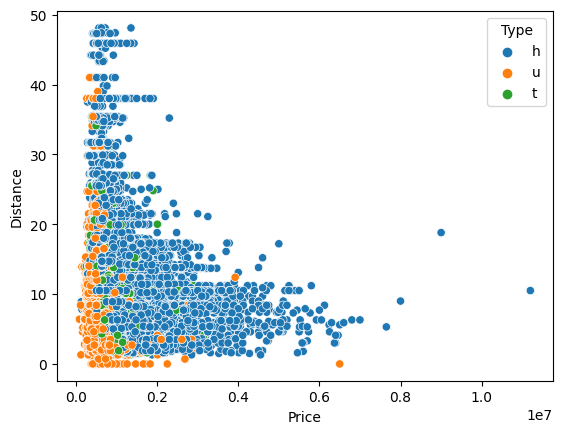

In [8]:
sns.scatterplot(data=df_raw, x='Price', y='Distance', hue='Type');


c:\Users\semih\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


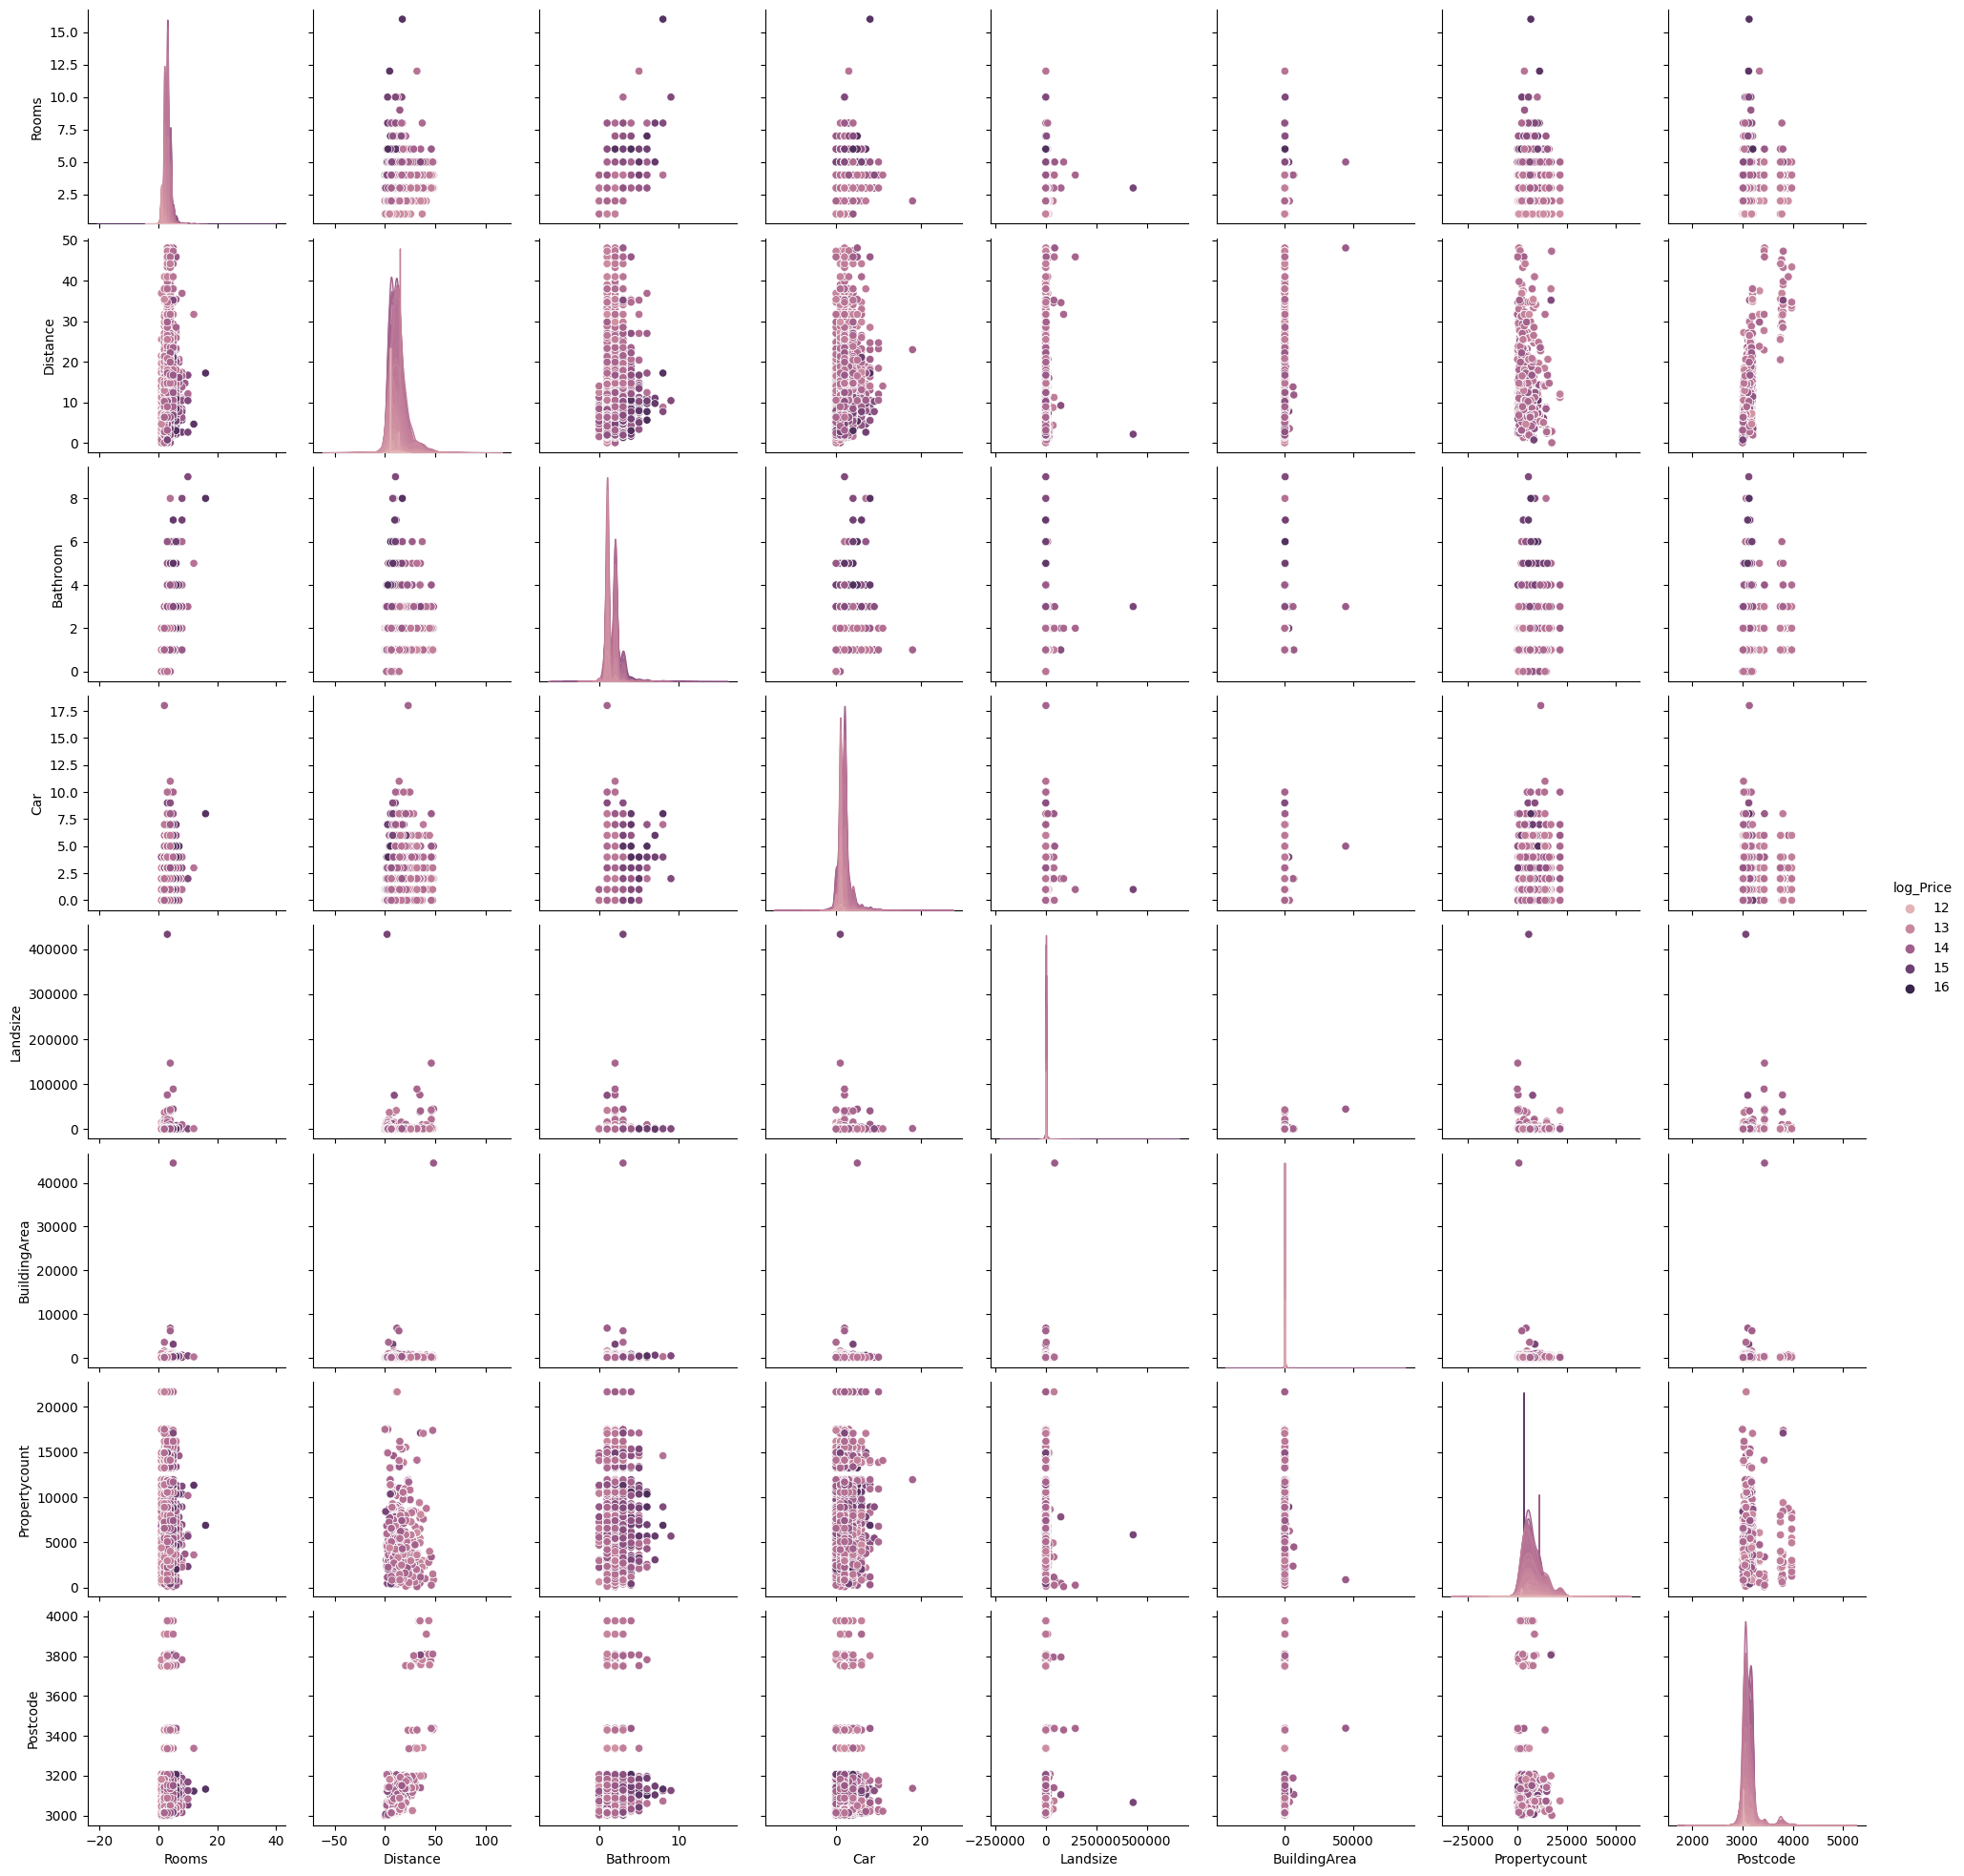

In [ ]:
sns.pairplot(df_raw,vars= ['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize','BuildingArea','Propertycount','Postcode'],hue = 'log_Price')

<Axes: title={'center': 'Correlation numeric_features'}>

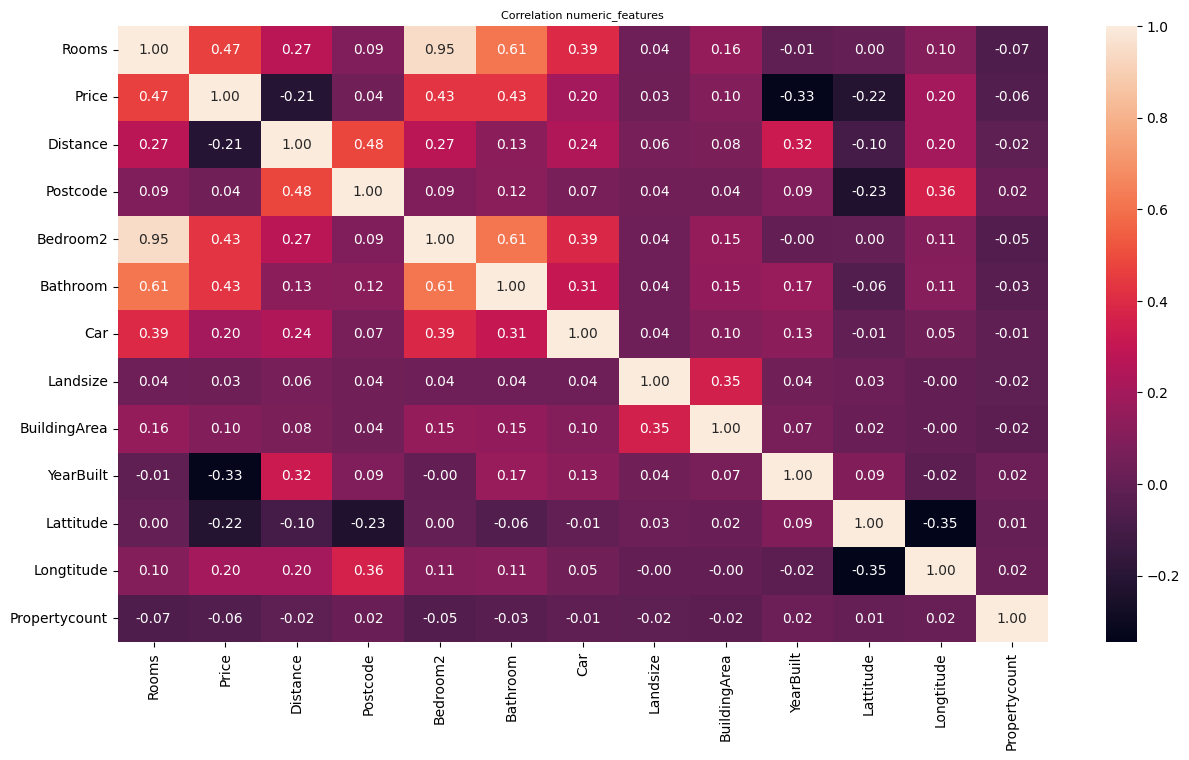

In [9]:
plt.figure(figsize=(15, 8))
corr=df[df.select_dtypes(['int', 'float']).columns].corr()
plt.title('Correlation numeric_features',fontsize=8)
sns.heatmap(corr,annot=True,fmt=".2f")

In [10]:
df_raw.columns.values
df_raw.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
log_Price         7610
dtype: int64

In [11]:
df_raw['high_price'] = np.where(
    df_raw['log_Price'] > (log_price_mean+log_price_std), 1, 0
)

df_raw['low_price'] = np.where(
    df_raw['log_Price'] < (log_price_mean-log_price_std), 1, 0
)

display(df_raw['high_price'].value_counts())
df_raw['low_price'].value_counts()

high_price
0    30493
1     4364
Name: count, dtype: int64

low_price
0    30741
1     4116
Name: count, dtype: int64

In [12]:
drop_list = ['Suburb', 'Address', 'SellerG', 'CouncilArea']
df_raw = df_raw.drop(drop_list, axis=1)

df_raw.head()

,Rooms,Type,Price,Method,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount,log_Price,high_price,low_price
0,2,h,NaN,SS,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,-37.8014,144.9958,Northern Metropolitan,4019.0,NaN,0,0
1,2,h,1480000.0,S,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,-37.7996,144.9984,Northern Metropolitan,4019.0,14.207553,0,0
2,2,h,1035000.0,S,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,Northern Metropolitan,4019.0,13.849913,0,0
3,3,u,NaN,VB,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,-37.8114,145.0116,Northern Metropolitan,4019.0,NaN,0,0
4,3,h,1465000.0,SP,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,Northern Metropolitan,4019.0,14.197366,0,0


In [13]:
df_raw[['Type', 'Method', 'Regionname']].isna().sum()

Type          0
Method        0
Regionname    3
dtype: int64

In [14]:
df_raw = df_raw.dropna(subset=['Type', 'Method', 'Regionname'], axis=0)

In [15]:
cat_encoder = OneHotEncoder(sparse_output=False)
df_raw_type_reshaped = df_raw['Type'].values.reshape(-1,1)
df_raw_type_1hot = cat_encoder.fit_transform(df_raw_type_reshaped)
categories = cat_encoder.categories_
df_raw_type_1hot = pd.DataFrame(df_raw_type_1hot, columns=categories)

In [16]:
df_raw = df_raw.reset_index().drop('index', axis=1)
df_raw = pd.concat([df_raw, df_raw_type_1hot], axis=1)
df_raw.head()

,Rooms,Type,Price,Method,Date,Distance,Postcode,Bedroom2,Bathroom,Car,...,Lattitude,Longtitude,Regionname,Propertycount,log_Price,high_price,low_price,"(h,)","(t,)","(u,)"
0,2,h,NaN,SS,3/09/2016,2.5,3067.0,2.0,1.0,1.0,...,-37.8014,144.9958,Northern Metropolitan,4019.0,NaN,0,0,1.0,0.0,0.0
1,2,h,1480000.0,S,3/12/2016,2.5,3067.0,2.0,1.0,1.0,...,-37.7996,144.9984,Northern Metropolitan,4019.0,14.207553,0,0,1.0,0.0,0.0
2,2,h,1035000.0,S,4/02/2016,2.5,3067.0,2.0,1.0,0.0,...,-37.8079,144.9934,Northern Metropolitan,4019.0,13.849913,0,0,1.0,0.0,0.0
3,3,u,NaN,VB,4/02/2016,2.5,3067.0,3.0,2.0,1.0,...,-37.8114,145.0116,Northern Metropolitan,4019.0,NaN,0,0,0.0,0.0,1.0
4,3,h,1465000.0,SP,4/03/2017,2.5,3067.0,3.0,2.0,0.0,...,-37.8093,144.9944,Northern Metropolitan,4019.0,14.197366,0,0,1.0,0.0,0.0


In [17]:
df_raw_meth_reshaped = df_raw['Method'].values.reshape(-1,1)
df_raw_meth_1hot = cat_encoder.fit_transform(df_raw_meth_reshaped)
categories = cat_encoder.categories_
df_raw_meth_1hot = pd.DataFrame(df_raw_meth_1hot, columns=categories)

# concat 1hot DataFrame w/ df_na
df_raw = pd.concat([df_raw, df_raw_meth_1hot], axis=1)
df_raw.head()

,Rooms,Type,Price,Method,Date,Distance,Postcode,Bedroom2,Bathroom,Car,...,"(u,)","(PI,)","(PN,)","(S,)","(SA,)","(SN,)","(SP,)","(SS,)","(VB,)","(W,)"
0,2,h,NaN,SS,3/09/2016,2.5,3067.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,h,1480000.0,S,3/12/2016,2.5,3067.0,2.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,h,1035000.0,S,4/02/2016,2.5,3067.0,2.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,u,NaN,VB,4/02/2016,2.5,3067.0,3.0,2.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,3,h,1465000.0,SP,4/03/2017,2.5,3067.0,3.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [18]:
df_raw_reg_reshaped = df_raw['Regionname'].values.reshape(-1,1)
df_raw_reg_1hot = cat_encoder.fit_transform(df_raw_reg_reshaped)
categories = cat_encoder.categories_
df_raw_reg_1hot = pd.DataFrame(df_raw_reg_1hot, columns=categories)

df_raw = pd.concat([df_raw, df_raw_reg_1hot], axis=1)
df_raw.head()

,Rooms,Type,Price,Method,Date,Distance,Postcode,Bedroom2,Bathroom,Car,...,"(VB,)","(W,)","(Eastern Metropolitan,)","(Eastern Victoria,)","(Northern Metropolitan,)","(Northern Victoria,)","(South-Eastern Metropolitan,)","(Southern Metropolitan,)","(Western Metropolitan,)","(Western Victoria,)"
0,2,h,NaN,SS,3/09/2016,2.5,3067.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,h,1480000.0,S,3/12/2016,2.5,3067.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,h,1035000.0,S,4/02/2016,2.5,3067.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,u,NaN,VB,4/02/2016,2.5,3067.0,3.0,2.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,3,h,1465000.0,SP,4/03/2017,2.5,3067.0,3.0,2.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [19]:
df_raw.isna().sum()

Rooms                                0
Type                                 0
Price                             7610
Method                               0
Date                                 0
Distance                             0
Postcode                             0
Bedroom2                          8214
Bathroom                          8223
Car                               8725
Landsize                         11807
BuildingArea                     21112
YearBuilt                        19303
Lattitude                         7973
Longtitude                        7973
Regionname                           0
Propertycount                        0
log_Price                         7610
high_price                           0
low_price                            0
(h,)                                 0
(t,)                                 0
(u,)                                 0
(PI,)                                0
(PN,)                                0
(S,)                     

In [20]:
df_na = df_raw.dropna(subset=['Price', 'log_Price'], axis=0)
df_na.isna().sum()

Rooms                                0
Type                                 0
Price                                0
Method                               0
Date                                 0
Distance                             0
Postcode                             0
Bedroom2                          6438
Bathroom                          6444
Car                               6821
Landsize                          9262
BuildingArea                     16588
YearBuilt                        15160
Lattitude                         6251
Longtitude                        6251
Regionname                           0
Propertycount                        0
log_Price                            0
high_price                           0
low_price                            0
(h,)                                 0
(t,)                                 0
(u,)                                 0
(PI,)                                0
(PN,)                                0
(S,)                     

In [21]:
objects = []

for i in df_raw.columns.values:
    if df_raw[i].dtype == 'O':
        objects.append(str(i))

df_na = df_na.drop(objects, axis=1)

df_na.isna().sum()

Rooms                                0
Price                                0
Distance                             0
Postcode                             0
Bedroom2                          6438
Bathroom                          6444
Car                               6821
Landsize                          9262
BuildingArea                     16588
YearBuilt                        15160
Lattitude                         6251
Longtitude                        6251
Propertycount                        0
log_Price                            0
high_price                           0
low_price                            0
(h,)                                 0
(t,)                                 0
(u,)                                 0
(PI,)                                0
(PN,)                                0
(S,)                                 0
(SA,)                                0
(SN,)                                0
(SP,)                                0
(SS,)                    

In [22]:
cols = ['Bedroom2', 'Bathroom', 'Car',
        'Landsize','BuildingArea', 'YearBuilt',
        'high_price', 'low_price']
df_num = df_na[cols]

df_num.isna().sum()

Bedroom2         6438
Bathroom         6444
Car              6821
Landsize         9262
BuildingArea    16588
YearBuilt       15160
high_price          0
low_price           0
dtype: int64

In [23]:
df_num.loc[df_num['high_price']==1] = df_num.loc[
    df_num['high_price']==1].apply(lambda x: x.fillna(x.median()),axis=0)
df_num.loc[df_num['low_price']==1] = df_num.loc[
    df_num['low_price']==1].apply(lambda x: x.fillna(x.median()),axis=0)
df_num.loc[df_num['high_price' and 'low_price']==0] = df_num.loc[
    df_num['high_price' and 'low_price']==0].apply(lambda x: x.fillna(x.median()),axis=0)

df_num.isna().sum()

Bedroom2        0
Bathroom        0
Car             0
Landsize        0
BuildingArea    0
YearBuilt       0
high_price      0
low_price       0
dtype: int64

In [24]:
df_na = pd.concat([df_na.drop(cols, axis=1), df_num], axis=1)
df_na.head()

,Rooms,Price,Distance,Postcode,Lattitude,Longtitude,Propertycount,log_Price,"(h,)","(t,)",...,"(Western Metropolitan,)","(Western Victoria,)",Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,high_price,low_price
1,2,1480000.0,2.5,3067.0,-37.7996,144.9984,4019.0,14.207553,1.0,0.0,...,0.0,0.0,2.0,1.0,1.0,202.0,165.0,1960.0,0,0
2,2,1035000.0,2.5,3067.0,-37.8079,144.9934,4019.0,13.849913,1.0,0.0,...,0.0,0.0,2.0,1.0,0.0,156.0,79.0,1900.0,0,0
4,3,1465000.0,2.5,3067.0,-37.8093,144.9944,4019.0,14.197366,1.0,0.0,...,0.0,0.0,3.0,2.0,0.0,134.0,150.0,1900.0,0,0
5,3,850000.0,2.5,3067.0,-37.7969,144.9969,4019.0,13.652993,1.0,0.0,...,0.0,0.0,3.0,2.0,1.0,94.0,165.0,1960.0,0,0
6,4,1600000.0,2.5,3067.0,-37.8072,144.9941,4019.0,14.285515,1.0,0.0,...,0.0,0.0,3.0,1.0,2.0,120.0,142.0,2014.0,1,0


In [25]:
col_list = ['Rooms', 'Price', 'Distance', 'Postcode', 'Lattitude',
            'Longtitude', 'Propertycount', 'log_Price', 'h', 't', 'u',
            'PI', 'PN', 'S', 'SA', 'SN', 'SP', 'SS',
            'VB', 'W', 'Eastern_Metropolitan', 'Eastern_Victoria',
            'Northern_Metropolitan', 'Northern_Victoria',
            'South_Eastern_Metropolitan', 'Southern_Metropolitan',
            'Western_Metropolitan', 'Western_Victoria', 'Bedroom2',
            'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt',
            'high_price', 'low_price']
df_na.columns = col_list

In [26]:
reg_cols = ['Eastern_Metropolitan', 'Eastern_Victoria',
            'Northern_Metropolitan', 'Northern_Victoria',
            'South_Eastern_Metropolitan', 'Southern_Metropolitan',
            'Western_Metropolitan', 'Western_Victoria']

for i in reg_cols:
    df_na.loc[df_na[i]==1] = df_na.loc[
        df_na[i]==1].apply(lambda x: x.fillna(x.median()),axis=0)
    
df_na.isna().sum()

Rooms                         0
Price                         0
Distance                      0
Postcode                      0
Lattitude                     0
Longtitude                    0
Propertycount                 0
log_Price                     0
h                             0
t                             0
u                             0
PI                            0
PN                            0
S                             0
SA                            0
SN                            0
SP                            0
SS                            0
VB                            0
W                             0
Eastern_Metropolitan          0
Eastern_Victoria              0
Northern_Metropolitan         0
Northern_Victoria             0
South_Eastern_Metropolitan    0
Southern_Metropolitan         0
Western_Metropolitan          0
Western_Victoria              0
Bedroom2                      0
Bathroom                      0
Car                           0
Landsize

In [27]:
df_na['Date'] = df_raw['Date']
df_na['Date'].head()
df_na['Date'] = pd.to_datetime(df_na['Date'], errors='raise', dayfirst=1)
df_na['Date'].head()

1   2016-12-03
2   2016-02-04
4   2017-03-04
5   2017-03-04
6   2016-06-04
Name: Date, dtype: datetime64[ns]

In [28]:
df_clean = df_na
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27244 entries, 1 to 34853
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Rooms                       27244 non-null  int64         
 1   Price                       27244 non-null  float64       
 2   Distance                    27244 non-null  float64       
 3   Postcode                    27244 non-null  float64       
 4   Lattitude                   27244 non-null  float64       
 5   Longtitude                  27244 non-null  float64       
 6   Propertycount               27244 non-null  float64       
 7   log_Price                   27244 non-null  float64       
 8   h                           27244 non-null  float64       
 9   t                           27244 non-null  float64       
 10  u                           27244 non-null  float64       
 11  PI                          27244 non-null  float64       


In [29]:
from collections import Counter
Z_list = ['Rooms','Distance', 'Postcode', 'Lattitude',
            'Longtitude', 'Propertycount','Bathroom', 'Car',
            'Landsize', 'BuildingArea', 'YearBuilt',
            ]
def z_score_method (df,n,features):
    outlier_list = []
    
    for column in features:
    
        data_mean = df[column].mean()
        data_std = df[column].std()
        threshold = 3

        z_score = abs( (df[column] - data_mean)/data_std )
        
        outlier_list_column =  df[z_score > threshold].index
        
        outlier_list.extend(outlier_list_column)
        
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    df1 = df[z_score > threshold]
    print('Total number of outliers is:', df1.shape[0])
    
    return multiple_outliers

In [30]:
Outliers_z_score = z_score_method(df_clean,1,Z_list)
df_clean.drop(Outliers_z_score, axis = 0).reset_index(drop=True)

Total number of outliers is: 147


,Rooms,Price,Distance,Postcode,Lattitude,Longtitude,Propertycount,log_Price,h,t,...,Western_Victoria,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,high_price,low_price,Date
0,2,1480000.0,2.5,3067.0,-37.79960,144.998400,4019.0,14.207553,1.0,0.0,...,0.0,2.0,1.0,1.0,202.0,165.0,1960.0,0,0,2016-12-03
1,2,1035000.0,2.5,3067.0,-37.80790,144.993400,4019.0,13.849913,1.0,0.0,...,0.0,2.0,1.0,0.0,156.0,79.0,1900.0,0,0,2016-02-04
2,3,1465000.0,2.5,3067.0,-37.80930,144.994400,4019.0,14.197366,1.0,0.0,...,0.0,3.0,2.0,0.0,134.0,150.0,1900.0,0,0,2017-03-04
3,3,850000.0,2.5,3067.0,-37.79690,144.996900,4019.0,13.652993,1.0,0.0,...,0.0,3.0,2.0,1.0,94.0,165.0,1960.0,0,0,2017-03-04
4,4,1600000.0,2.5,3067.0,-37.80720,144.994100,4019.0,14.285515,1.0,0.0,...,0.0,3.0,1.0,2.0,120.0,142.0,2014.0,1,0,2016-06-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26707,4,1480000.0,6.3,3013.0,-37.81053,144.884670,6543.0,14.207553,1.0,0.0,...,0.0,4.0,1.0,3.0,593.0,165.0,1960.0,0,0,2018-02-24
26708,2,888000.0,6.3,3013.0,-37.81551,144.888260,6543.0,13.696728,1.0,0.0,...,0.0,2.0,2.0,1.0,98.0,104.0,2018.0,0,0,2018-02-24
26709,2,705000.0,6.3,3013.0,-37.82286,144.878560,6543.0,13.465955,0.0,1.0,...,0.0,2.0,1.0,2.0,220.0,120.0,2000.0,0,0,2018-02-24
26710,3,1140000.0,6.3,3013.0,-37.77960,144.874025,6543.0,13.946540,1.0,0.0,...,0.0,3.0,2.0,2.0,559.0,165.0,1960.0,0,0,2018-02-24


In [31]:

drop_list = ['Price', 'log_Price', 'high_price', 'low_price', 'Date']
data = df_clean.drop(drop_list, axis=1)
target = df_clean['log_Price']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.2, random_state=42)

# scale X_train values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.astype(np.float64))
X_test = scaler.transform(X_test.astype(np.float64))

In [49]:

from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn import metrics


models = {
    'Lasso': Lasso(alpha = .001, max_iter = 1000, random_state=5),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'ElasticNet': ElasticNet(alpha = 0.1, l1_ratio=0.1),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor(n_estimators=5, learning_rate=1.2, loss='exponential', random_state=2)
}

In [50]:
results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r_squared = metrics.r2_score(y_test, y_pred)
    Adj_r2 = 1 - (1-r_squared) * (len(target)-1)/(len(target)-data.shape[1]-1)

    results[model_name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R^2': r_squared,
        'AdjR^2': Adj_r2
    }

for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print('MAE:', metrics['MAE'])
    print('MSE:', metrics['MSE'])
    print('RMSE:', metrics['RMSE'])
    print('R^2 =', metrics['R^2'])
    print('AdjR^2 =', metrics['AdjR^2'])
    print('\n')

Model: Lasso
MAE: 0.20867328566699303
MSE: 0.07396568161572792
RMSE: 0.27196632441485824
R^2 = 0.7283154775970833
AdjR^2 = 0.727995977956611


Model: LinearRegression
MAE: 0.2084857668337009
MSE: 0.07386833327752414
RMSE: 0.2717872941797025
R^2 = 0.7286730493275652
AdjR^2 = 0.7283539701896606


Model: Ridge
MAE: 0.20849461186751245
MSE: 0.0738608487138184
RMSE: 0.27177352467416394
R^2 = 0.7287005409976393
AdjR^2 = 0.7283814941898015


Model: ElasticNet
MAE: 0.21615291556683836
MSE: 0.0784185476056947
RMSE: 0.28003311876578935
R^2 = 0.7119595846561728
AdjR^2 = 0.7116208505673484


Model: KNeighborsRegressor
MAE: 0.17530686191026706
MSE: 0.05416936701252992
RMSE: 0.23274313526402862
R^2 = 0.8010296358502277
AdjR^2 = 0.8007956476964372


Model: RandomForestRegressor
MAE: 0.13043281960566352
MSE: 0.031314082153523944
RMSE: 0.17695785417303167
R^2 = 0.8849797464374772
AdjR^2 = 0.8848444831941564


Model: GradientBoostingRegressor
MAE: 0.14763548587884712
MSE: 0.03736680514627234
RMSE: 0.193